In [1]:
import ConfigParser
import pandas as pd
import datetime
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
conf = ConfigParser.RawConfigParser()
conf.read('cli.properties')
hostName = conf.get('AiravataServer', 'host')
port = conf.get('AiravataServer', 'port')

In [2]:
from airavata_cli import AiravataCLI
airavata_cli = AiravataCLI(hostName, int(port))
print(airavata_cli.printVersion())

0.16.0
0.16.0

Welcome to Airavata CLI v0.0.1 - Wirtten in python


None


##Making Sure we are connected to the right Gateway

In [3]:
airavata_cli.get_gatewaylist()

[Gateway(gatewayId='Ultrascan_Production', emailAddress=None, domain=None, gatewayName='Ultrascan_Production')]

## List of Resources the Gateway uses

In [4]:
airavata_cli.computer_resources().items()

[('alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29',
  'alamo.uthscsa.edu'),
 ('Jureca_32098185-4396-4c11-afb7-26e991a03476', 'Jureca'),
 ('comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b', 'comet.sdsc.edu'),
 ('gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7', 'gordon.sdsc.edu'),
 ('ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf',
  'ls5.tacc.utexas.edu'),
 ('stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12',
  'stampede.tacc.xsede.org')]

compute_resources = pd.DataFrame(list(airavata_cli.computer_resources().items()), columns=["Id", "Name"])
compute_resources

## Some other custom functions which can be created

In [5]:
airavata_cli.list_of_applications('Ultrascan_Production')

[ApplicationInterfaceDescription(applicationName='Ultrascan', applicationInputs=[InputDataObjectType(userFriendlyDescription='Ultrascan HPC Input Tar File', name='Input_Tar_File', dataStaged=False, value='', applicationArgument='', isRequired=False, standardInput=False, requiredToAddedToCommandLine=True, type=3, inputOrder=1, metaData=''), InputDataObjectType(userFriendlyDescription='Batches for multi-wavelength data processing', name='Parallel_Group_Count', dataStaged=False, value='-mgroupcount=1', applicationArgument='', isRequired=False, standardInput=False, requiredToAddedToCommandLine=True, type=0, inputOrder=3, metaData=''), InputDataObjectType(userFriendlyDescription='Wall Clock Limit on the Compute Resource', name='Wall_Time', dataStaged=False, value='-walltime=60', applicationArgument='', isRequired=True, standardInput=False, requiredToAddedToCommandLine=True, type=0, inputOrder=2, metaData='')], applicationInterfaceId='Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46', applicat

In [6]:
airavata_cli.module_descriptions('Ultrascan_Production')     

[ApplicationModule(appModuleName='Ultrascan', appModuleVersion='Ultrascan Application', appModuleId='Ultrascan_82282f1e-284f-4999-9beb-4620c485b03d', appModuleDescription=''),
 ApplicationModule(appModuleName='Ultrascan_Unicore', appModuleVersion='', appModuleId='Ultrascan_Unicore_2471953d-5d87-4ffc-b0e6-b06c86c6206d', appModuleDescription='Ultrascan Unicore Application')]

##Setting the time parameters

In [7]:
start= datetime(2015,7,16,15,10)
end= datetime(2016,7,17,11,59)
fromTime = calendar.timegm(start.timetuple())
toTime = calendar.timegm(end.timetuple())

## Getting the list of Experiments executed during the above mentioned period

In [8]:
ds=airavata_cli.experiment_statistics("Ultrascan_Production", fromTime*1000, toTime*1000)
ds

ExperimentStatistics(failedExperiments=[ExperimentSummaryModel(userName='Paul_Willard_098ba7b6-274c-9fb4-4915-f7ecc0c7cc1f', name='US3-AIRA', statusUpdateTime=None, resourceHostId='ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf', projectId='Default_Project_b884d629-32bf-4532-ae76-8366db32bd76', creationTime=1468610916000L, experimentId='US3-AIRA_bfe0ab01-db1f-4ccc-b3a0-e4e3e4224b29', executionId='Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46', gatewayId='Ultrascan_Production', experimentStatus='FAILED', description=None), ExperimentSummaryModel(userName='Akash_Bhattacharya_65724131-4b32-bec4-5974-aa29b945deaf', name='US3-AIRA', statusUpdateTime=None, resourceHostId='ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf', projectId='Default_Project_68d470e1-a74d-4cea-ab2f-5a87eed9ff6b', creationTime=1465924612000L, experimentId='US3-AIRA_a51470cc-5f0c-4c45-a116-5fa711345522', executionId='Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46', gatewayId='Ultrascan_Production', ex

In [9]:
All_Experiments = []
for i in ds.allExperiments:
    All_Experiments.append([i.userName, i.name, i.statusUpdateTime, i.resourceHostId, i.projectId, i.creationTime, 
                                i.experimentId, i.executionId, i.gatewayId, i.experimentStatus])
labels = ["User Name", "Name", "Status Update", "Resource Host ID", "Project ID", "Creation Time", "Experiment ID", 
          "Execution ID", "Gateway ID", "Experiment Status"]
df = pd.DataFrame(data=All_Experiments, columns=labels)
df.head()

User Name      Name Status Update  \
0  Daniel_Krzizike_550162c5-88f4-5624-cd19-114778...  US3-AIRA          None   
1  Paul_Willard_098ba7b6-274c-9fb4-4915-f7ecc0c7cc1f  US3-AIRA          None   
2  Paul_Willard_098ba7b6-274c-9fb4-4915-f7ecc0c7cc1f  US3-AIRA          None   
3  Daniel_Krzizike_550162c5-88f4-5624-cd19-114778...  US3-AIRA          None   
4  Daniel_Krzizike_550162c5-88f4-5624-cd19-114778...  US3-AIRA          None   

                                    Resource Host ID  \
0  ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aa...   
1  ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aa...   
2  ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aa...   
3  ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aa...   
4  ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aa...   

                                          Project ID  Creation Time  \
0  Default_Project_4e1dede8-0925-47e6-b61c-966051...  1468618483000   
1  Default_Project_b884d629-32bf-4532-ae76-8366db...  1468616186000   
2  Default_Project_b884d629-32bf-4532-ae76-8366db...  1468615898000   
3  Default_Project_4e1dede8-0925-47e6-b61c-966051...  1468612459000   
4  Default_Project_4e1dede8-0925-47e6-b61c-966051...  1468612433000   

                                   Experiment ID  \
0  US3-AIRA_36f4788f-240b-4119-aaed-18926be8165c   
1  US3-AIRA_408946e3-6104-48b3-a9dc-27ec03f45cb2   
2  US3-AIRA_270ed9fe-f0f9-4c00-936f-72c994cb2125   
3  US3-AIRA_c23effff-bf70-4d77-968a-5982919eb3a0   
4  US3-AIRA_2e65cd86-b4f2-4514-99c2-68c6cec880f4   

                                     Execution ID            Gateway ID  \
0  Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46  Ultrascan_Production   
1  Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46  Ultrascan_Production   
2  Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46  Ultrascan_Production   
3  Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46  Ultrascan_Production   
4  Ultrascan_0ed937f6-26af-4c54-8064-3be082411e46  Ultrascan_Production   

  Experiment Status  
0         COMPLETED  
1         COMPLETED  
2         COMPLETED  
3         COMPLETED  
4         COMPLETED

In [10]:
df.shape

(4124, 10)

## Calculating percentage use of resources

In [11]:
ls5_cn = sum([1 for x, row in df.iterrows() if row[3] == 'ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf' and row[9] == 'COMPLETED'])
stampede_cn = sum([1 for x, row in df.iterrows() if row[3] == 'stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12' and row[9] == 'COMPLETED'])
comet_cn = sum([1 for x, row in df.iterrows() if row[3] == 'comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b' and row[9] == 'COMPLETED'])
gordon_cn= sum([1 for x, row in df.iterrows() if row[3] == 'gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7' and row[9] == 'COMPLETED'])
#jureca_cn = sum([1 for x, row in df.iterrows() if row[3] == 'Jureca_32098185-4396-4c11-afb7-26e991a03476' and row[9] == 'COMPLETED'])
alamo_cn = sum([1 for x, row in df.iterrows() if row[3] == 'alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29' and row[9] == 'COMPLETED'])

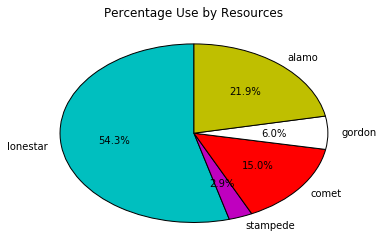

In [12]:
slices= [ls5_cn,stampede_cn,comet_cn,gordon_cn,alamo_cn]
cols = ['c','m','r','w','y']
Hosts= ["lonestar","stampede","comet","gordon" , "alamo"]
plt.pie(slices,
        labels= Hosts,
        colors=cols,
        startangle=90,
        shadow= False,
        autopct='%1.1f%%')

plt.title('Percentage Use by Resources')
plt.show()

##Percentage failed by resources

In [13]:
ls5_fn = sum([1 for x, row in df.iterrows() if row[3] == 'ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf' and row[9] == 'FAILED'])
stampede_fn = sum([1 for x, row in df.iterrows() if row[3] == 'stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12' and row[9] == 'FAILED'])
comet_fn = sum([1 for x, row in df.iterrows() if row[3] == 'comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b' and row[9] == 'FAILED'])
gordon_fn= sum([1 for x, row in df.iterrows() if row[3] == 'gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7' and row[9] == 'FAILED'])
#jureca_fn = sum([1 for x, row in df.iterrows() if row[3] == 'Jureca_32098185-4396-4c11-afb7-26e991a03476' and row[9] == 'FAILED'])
alamo_fn = sum([1 for x, row in df.iterrows() if row[3] == 'alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29' and row[9] == 'FAILED'])

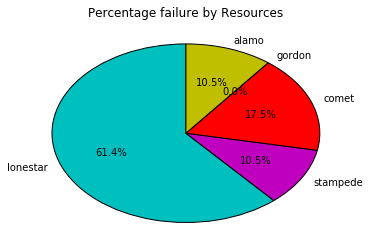

In [14]:
slices= [ls5_fn,stampede_fn,comet_fn,gordon_fn,alamo_fn]
cols = ['c','m','r','w','y']
Hosts= ["lonestar","stampede","comet","gordon" , "alamo"]
plt.pie(slices,
        labels= Hosts,
        colors=cols,
        startangle=90,
        shadow= False,
        autopct='%1.1f%%')

plt.title('Percentage failure by Resources')
plt.show()

## Percentage cancelled by resources

In [15]:
ls5_xn = sum([1 for x, row in df.iterrows() if row[3] == 'ls5.tacc.utexas.edu_6dd67b08-30e5-4f74-bdd6-aad1f8310ecf' and row[9] == 'CANCELED'])
stampede_xn = sum([1 for x, row in df.iterrows() if row[3] == 'stampede.tacc.xsede.org_bf7958ae-f9d4-468b-b146-a201fb89bf12' and row[9] == 'CANCELED'])
comet_xn = sum([1 for x, row in df.iterrows() if row[3] == 'comet.sdsc.edu_f24b0bba-5230-498d-97e2-46a975ee035b' and row[9] == 'CANCELED'])
gordon_xn= sum([1 for x, row in df.iterrows() if row[3] == 'gordon.sdsc.edu_f9363997-4614-477f-847e-79d262ee8ef7' and row[9] == 'CANCELED'])
#jureca_xn = sum([1 for x, row in df.iterrows() if row[3] == 'Jureca_32098185-4396-4c11-afb7-26e991a03476' and row[9] == 'CANCELED'])
alamo_xn = sum([1 for x, row in df.iterrows() if row[3] == 'alamo.uthscsa.edu_4793b5cc-b991-4e43-b82d-17163b64ef29' and row[9] == 'CANCELED'])

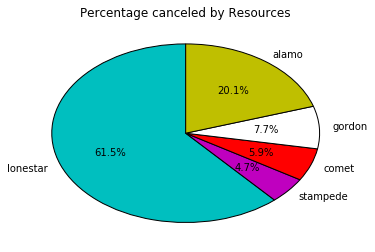

In [16]:
slices= [ls5_xn,stampede_xn,comet_xn,gordon_xn,alamo_xn]
cols = ['c','m','r','w','y']
Hosts= ["lonestar","stampede","comet","gordon" , "alamo"]
plt.pie(slices,
        labels= Hosts,
        colors=cols,
        startangle=90,
        shadow= False,
        autopct='%1.1f%%')

plt.title('Percentage canceled by Resources')
plt.show()

## Number of Experiments Canceled by a user

In [17]:
number = sum([1 for x, row in df.iterrows() if row[0] == 'smarru' and row[9] == 'CANCELED'])
number

0

## Sorting users by the number of experiments cancelled/failed

In [18]:
df[df['Experiment Status'] == 'CANCELED']['User Name'].value_counts().sort_values(ascending=False)

Daniel_Krzizike_550162c5-88f4-5624-cd19-1147783ec5ed        44
Victoria_Saenz_3963bfc5-9a55-d8f4-35f2-a98819ba7825         36
Uma_Muthurajan_912a2d20-e858-a4b4-fdbf-6cdf8ec8e182         18
Shaoxiong_Tian_f3c15677-e1d3-c894-7539-005f6df5e1b6         18
Borries_Demeler_02d0c21b-1adf-9414-c175-d005bb256320         9
Akash_Bhattacharya_65724131-4b32-bec4-5974-aa29b945deaf      9
Ge_Yu_8d9a3ed0-135a-c974-69f5-44beb56d182f                   6
Aysha Kinjo_Demeler_6804fe7e-35ce-f604-3905-bb73330ef346     4
Todd_Stone_8aee0ad6-f820-8584-f18a-9a0fa325fd34              4
Chris_Pierini_1c0bf9ca-2756-f454-355c-fbce45017f8b           4
Gary_Gorbet_84f540d7-3276-8894-a544-fae60062b41c             3
Borries_Demeler_0b30314f-70d9-74d4-7564-d9684b1a9a13         3
William_Dean_e199fd03-1b9a-a214-ad3f-1d25202091c9            3
Chris_Pierini_36b27c6b-f5ad-3794-6d81-0038d249d19b           2
Aysha_Demeler_09d108a4-4a6c-f884-e971-5ea68f402fde           1
Claudius_Mundoma_e1c6c320-ca98-f704-255c-b44fd6642c4d  

##  Experiments Created by the hour of the day

In [19]:
df['hour_of_day'] = df['Creation Time'].apply(lambda time: datetime.utcfromtimestamp(time/1000).hour)

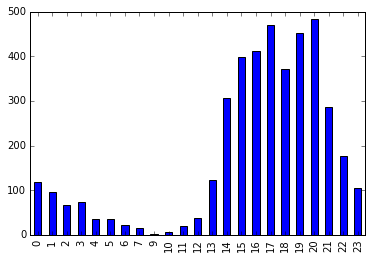

In [20]:
df['hour_of_day'].value_counts().sort_index().plot('bar')

## Experiments failed by the hour of the day

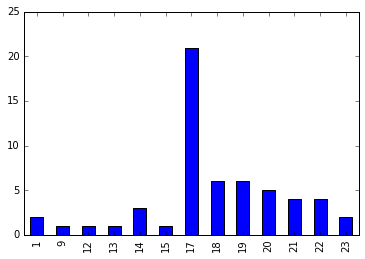

In [21]:
df[df['Experiment Status'] == 'FAILED']['hour_of_day'].value_counts().sort_index().plot('bar')

## Experiments canceled by the hour of the day